# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [16]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [10]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [12]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

GRE has a larger range of scores than GPA. GRE scores fall within the range of 220-800, while GPA scores fall within the range of 2.26 to 4.00

#### Question 4. Drop data points with missing data


In [13]:
df_complete = df_raw.dropna()
df_complete.shape

(397, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [14]:
df_complete.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


All variables now have the same number of entries (397). Previously, we saw that admit, gre, gpa & prstige had different count numbers in the summary table as those wiith na values were not counted.

#### Question 6. Create box plots for GRE and GPA

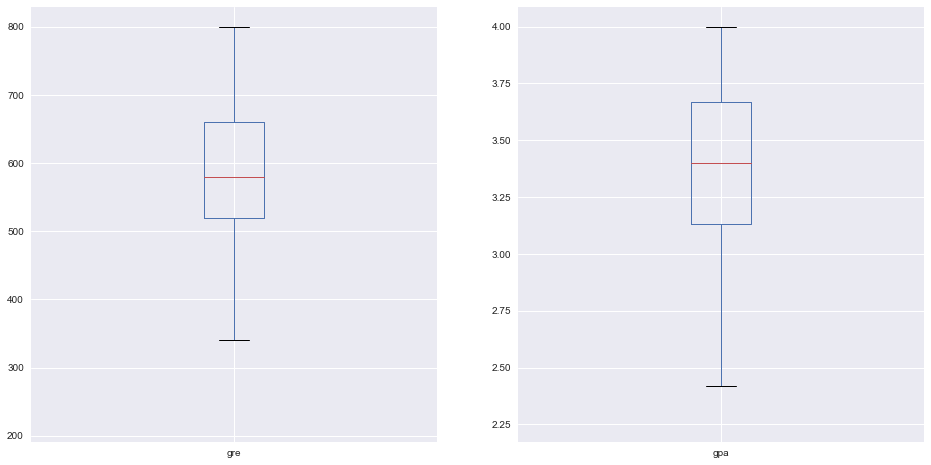

In [25]:
#Create box plots to identify outliers
fig, axs = plt.subplots(1, 2, sharey=False)
df_complete.gre.plot(kind='box', ax=axs[0], figsize=(16, 8))
df_complete.gpa.plot(kind='box', ax=axs[1])

#### Question 7. What do this plots show?

Answer: The plots show that there are some outliers for both gpa and gre. From the box plot, we also able to identify the interquartile range and median valuess for gpa and gre. 
gpa data has a stronger negative skew compared to gre. 


#### Question 8. Describe each distribution 

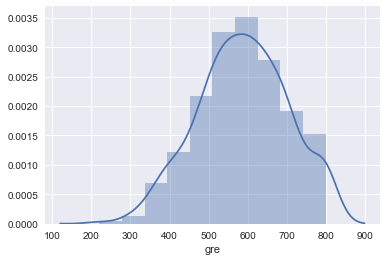

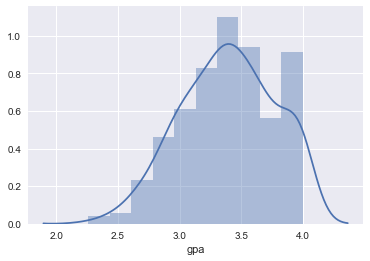

In [37]:
# plot the distribution of each variable 
sns.distplot(df_complete.gre, bins=10)
plt.show()
sns.distplot(df_complete.gpa, bins=10)
plt.show()


In [ ]:
gre and gpa both follow a normal distribution with a slight negative skew.

In [15]:
df_complete.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Distribution can be normalized such that all variables have a standdard normal distribution.

#### Question 11. Which of our variables are potentially colinear? 

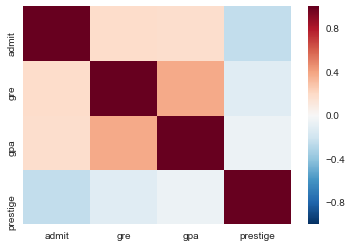

In [39]:
# create a correlation matrix for the data
sns.heatmap(df_complete[['admit','gre','gpa','prestige']].corr())
plt.show()

#### Question 12. What did you find?

Answer: gre & gpa has the strongest correlation among the variables in the dataset.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Get dummy variables for non categorical variables (presstige).
2. Perform a regression analyis using all varaibles where admit it the outcome of the model and the remaining variables can be used to predict the outcome (gpa, gre, prestige).
3. Intepret the result. Check the p-value and drop the variable with the largest value.
4. Run the model again with with the remaining values. Repeat step 3 until the all p values are <0.05. This means that the remaining factors are statistically significant in predicting the outcome of 'admit'.
5. Read the coefficient of the final model to understand how much the variable contributes to the finaal admit outcome.
6. Compute  MAE, MSE, and RMSE to evaluate the model.



#### Question 14. What is your hypothesis? 

Answer: 
Null hypothesis, $H_0$: There is no relationship between the prestige, gre,and gpa of a student's undergraduate school and his or her rate of admission into graduate school

Alternate hypothesis, $H_1$: Students from more prestigious undergraduate schools, higher gpa and higher gre scores will have higher admissions rates into graduate school.

test

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data